# Pandas - Analise e Preparação dos Dados

### Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import pylab

### Configuração do ambiente

In [2]:
pd.options.display.float_format = '{:20,.2f}'.format
pd.option_context('display.precision', 2)
plt.style.use("seaborn")

### Dataframe para o exemplo

In [3]:
ds = pd.read_csv('Datasets\Arquivo_Salarios_Colaboradores_2020.csv',sep=';', decimal=',')
ds.head()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
0,1,"8,000.80",25,4,11,1,1,1,0,79.38
1,2,"8,500.17",24,5,11,0,0,1,0,84.13
2,3,"3,350.59",22,1,12,0,0,0,0,46.15
3,4,"9,500.24",28,4,14,1,0,0,1,83.85
4,5,"1,500.63",12,2,12,0,0,0,1,73.64


In [4]:
#Leitura dos arquivos
df1 = pd.read_excel("Datasets/Aracaju.xlsx")
df2 = pd.read_excel("Datasets/Fortaleza.xlsx")
df3 = pd.read_excel("Datasets/Natal.xlsx")
df4 = pd.read_excel("Datasets/Recife.xlsx")
df5 = pd.read_excel("Datasets/Salvador.xlsx")
#juntando todos os arquivos
dfvendas = pd.concat([df1,df2,df3,df4,df5])
dfvendas["Receita"] = dfvendas["Vendas"].mul(dfvendas["Qtde"])

## Visualização dos Dados

### Gráfico de Barras

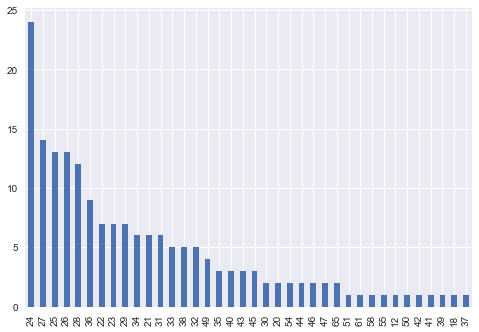

In [5]:
ds["idade"].value_counts(ascending=False).plot.bar();

### Gráfico de barras horizontais

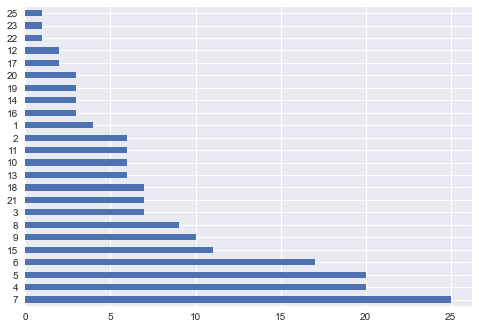

In [6]:
ds["tempocasa"].value_counts().plot.barh();

### Ordenando o gráfico

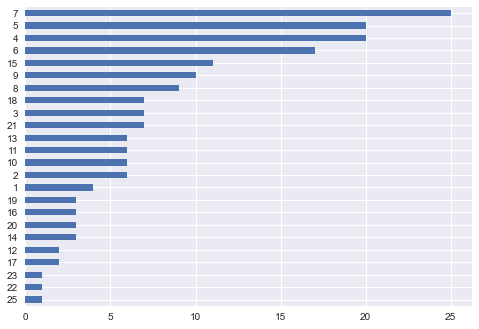

In [7]:
ds["tempocasa"].value_counts(ascending=True).plot.barh();

### Adicionando um título e alterando o nome dos eixos

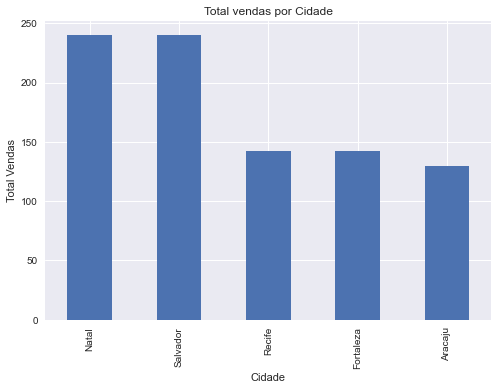

In [8]:
dfvendas["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

### Alterando a cor

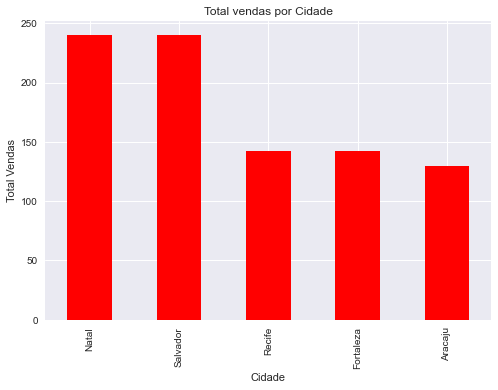

In [9]:
dfvendas["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

### Gráfico de Pizza

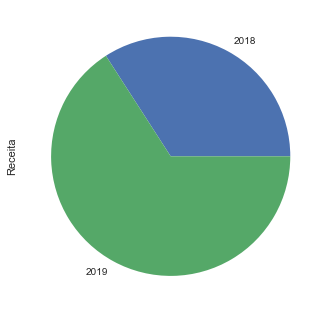

In [10]:
dfvendas.groupby(dfvendas["Data"].dt.year)["Receita"].sum().plot.pie();

### Gráfico de Linha

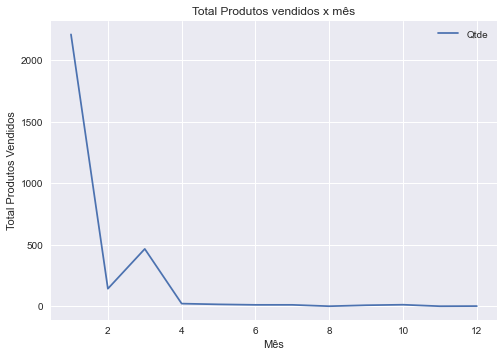

In [11]:
dfvendas["mes_venda"], dfvendas["dia_venda"] = (dfvendas["Data"].dt.month, dfvendas["Data"].dt.day)
dfvendas.groupby(dfvendas["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

### Alterando o estilo

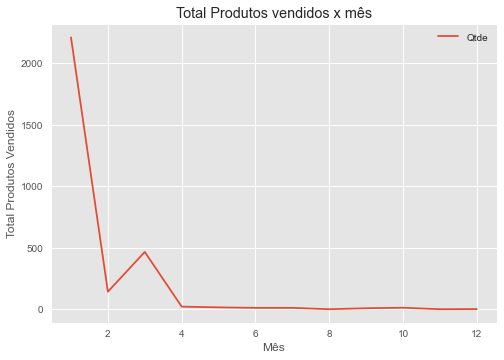

In [12]:
plt.style.use("ggplot")
dfvendas.groupby(dfvendas["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

### Gráfico de Dispersão

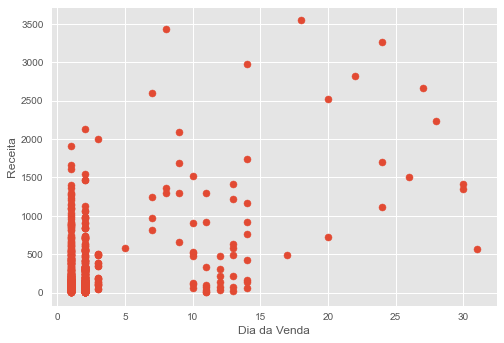

In [13]:
dfvendas["Ano_Venda"] = dfvendas["Data"].dt.year
df_2019 = dfvendas[dfvendas["Ano_Venda"] == 2019]
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"])
plt.xlabel("Dia da Venda")
plt.ylabel("Receita");

### Salvando a imagem

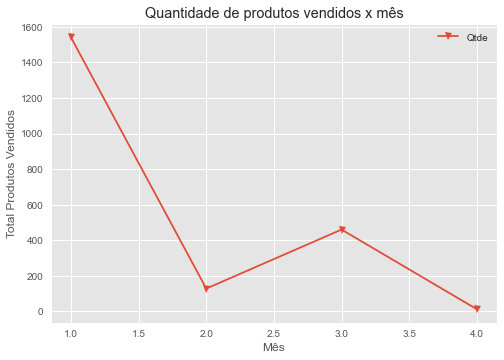

In [14]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")

## Análises Diversas e Preparação dos Dados

### Estatísticas do Dataframe

In [15]:
ds.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00,180.00
mean,90.50,"8,539.49",31.04,9.07,12.58,1.27,0.28,0.55,0.50,71.74
std,52.11,"4,729.51",9.40,5.61,2.57,1.22,0.45,0.50,0.50,15.99
min,1.00,"1,500.63",12.00,1.00,7.00,0.00,0.00,0.00,0.00,34.48
25%,45.75,"5,491.23",24.00,5.00,11.00,1.00,0.00,0.00,0.00,60.41
50%,90.50,"7,551.12",28.00,7.00,13.00,1.00,0.00,1.00,0.50,72.08
75%,135.25,"10,584.68",36.00,13.00,14.00,1.00,1.00,1.00,1.00,83.85
max,180.00,"25,329.91",65.00,25.00,19.00,7.00,1.00,1.00,1.00,98.96


## Avaliando as Correlações entre as variáveis

### Correlação Pearson - Indicado para variáveis quantitativas

In [16]:
ds.corr()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
Ordem,1.00,0.19,0.21,0.14,0.37,0.12,0.16,-0.01,0.13,-0.02
salario,0.19,1.00,0.60,0.33,0.49,0.52,-0.02,0.36,0.24,0.08
idade,0.21,0.60,1.00,0.22,0.30,0.49,-0.10,0.16,-0.00,0.04
tempocasa,0.14,0.33,0.22,1.00,-0.06,0.09,-0.04,0.12,-0.03,0.07
escolar,0.37,0.49,0.30,-0.06,1.00,0.30,-0.10,0.15,0.18,-0.06
qproj_estra,0.12,0.52,0.49,0.09,0.30,1.00,-0.06,0.25,0.26,0.09
proj_sustent,0.16,-0.02,-0.10,-0.04,-0.10,-0.06,1.00,-0.06,0.25,0.05
proj_6sigma,-0.01,0.36,0.16,0.12,0.15,0.25,-0.06,1.00,0.06,0.07
proj_social,0.13,0.24,-0.00,-0.03,0.18,0.26,0.25,0.06,1.00,0.12
notaavalia,-0.02,0.08,0.04,0.07,-0.06,0.09,0.05,0.07,0.12,1.00


### Correlação de Spearman - Correlação com variáveis não exigindo que elas sejam quantitativas

In [17]:
ds.corr(method="spearman")

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
Ordem,1.00,0.18,0.27,0.20,0.38,0.08,0.16,-0.01,0.13,-0.01
salario,0.18,1.00,0.49,0.32,0.48,0.44,-0.02,0.36,0.25,0.06
idade,0.27,0.49,1.00,0.14,0.34,0.38,-0.06,0.11,-0.01,0.07
tempocasa,0.20,0.32,0.14,1.00,-0.03,0.05,-0.04,0.14,-0.07,0.07
escolar,0.38,0.48,0.34,-0.03,1.00,0.31,-0.07,0.14,0.20,-0.03
qproj_estra,0.08,0.44,0.38,0.05,0.31,1.00,-0.11,0.25,0.20,0.06
proj_sustent,0.16,-0.02,-0.06,-0.04,-0.07,-0.11,1.00,-0.06,0.25,0.04
proj_6sigma,-0.01,0.36,0.11,0.14,0.14,0.25,-0.06,1.00,0.06,0.05
proj_social,0.13,0.25,-0.01,-0.07,0.20,0.20,0.25,0.06,1.00,0.11
notaavalia,-0.01,0.06,0.07,0.07,-0.03,0.06,0.04,0.05,0.11,1.00


## Análise com Histogramas

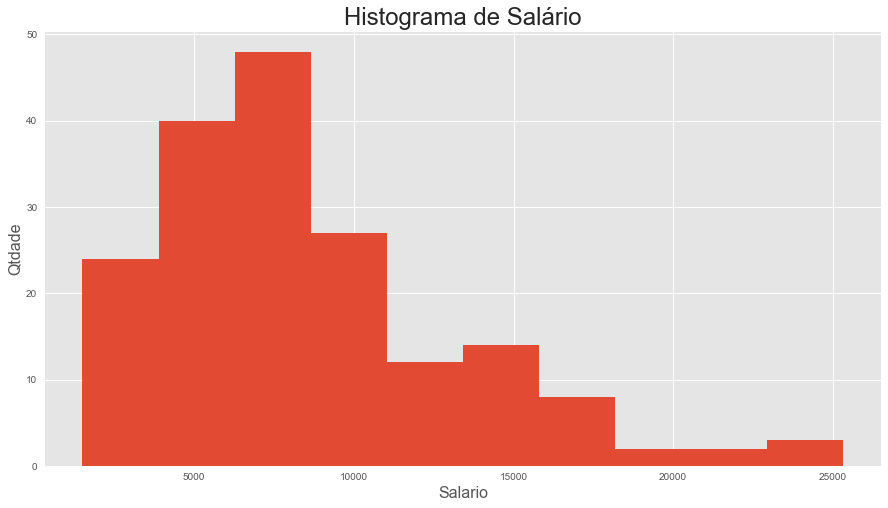

In [18]:
# Analisando Salário
plt.figure(figsize=(15,8))
plt.hist(ds.salario)
plt.xlabel('Salario', fontsize=16)
plt.ylabel('Qtdade', fontsize=16)
plt.title('Histograma de Salário', fontsize=24)
plt.show();

### Versão Suavizada (Density=True) do Histograma

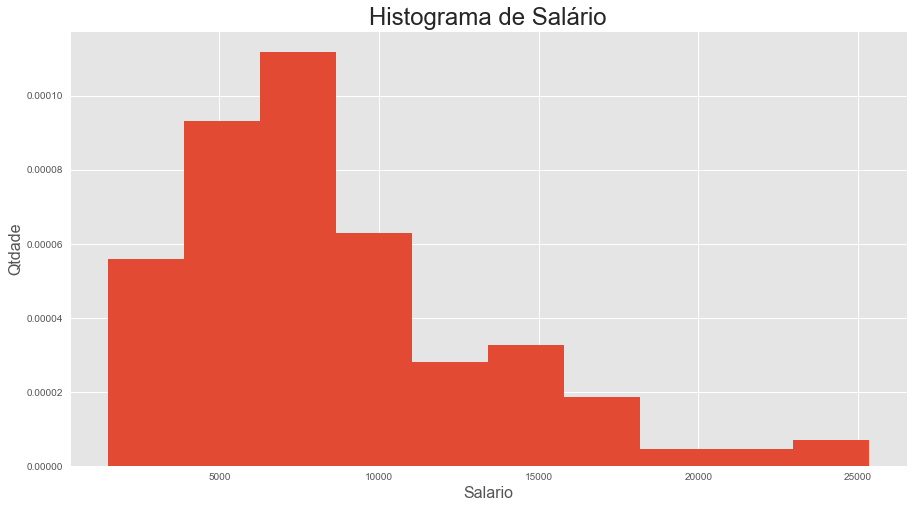

In [19]:
# Analisando Salário levando em conta a densidade
plt.figure(figsize=(15,8))
plt.hist(ds.salario,density=True)
plt.xlabel('Salario', fontsize=16)
plt.ylabel('Qtdade', fontsize=16)
plt.title('Histograma de Salário', fontsize=24)
plt.show();

## Análise de Outliers com Boxplot

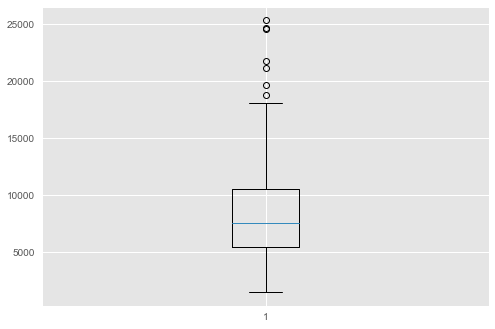

In [20]:
plt.boxplot(ds.salario);

## Transformando variáveis para facilitar a análise
#### No exemplo, criamos uma variável com a raiz quadrada de salário

In [21]:
ds['sqrt_salario'] = ds.loc[:,'salario'].apply(lambda x : np.sqrt(x))

In [22]:
ds.loc[0:10,['salario','sqrt_salario']]

,salario,sqrt_salario
0,"8,000.80",89.45
1,"8,500.17",92.20
2,"3,350.59",57.88
3,"9,500.24",97.47
4,"1,500.63",38.74
5,"5,500.22",74.16
6,"3,500.06",59.16
7,"13,750.67",117.26
8,"4,750.70",68.93
9,"6,750.83",82.16


### Para validar se está correto, podemos criar uma com a potência da raiz quadrada

In [23]:
ds['f_salario'] = ds.loc[:,'sqrt_salario'].apply(lambda x : x**2)

In [24]:
ds.loc[0:10,['salario','f_salario']]

,salario,f_salario
0,"8,000.80","8,000.80"
1,"8,500.17","8,500.17"
2,"3,350.59","3,350.59"
3,"9,500.24","9,500.24"
4,"1,500.63","1,500.63"
5,"5,500.22","5,500.22"
6,"3,500.06","3,500.06"
7,"13,750.67","13,750.67"
8,"4,750.70","4,750.70"
9,"6,750.83","6,750.83"


### Com o gráfico de probabilidade, podemos ver que o valor da raiz quadrada de salário fica mais próximo de uma distribuição normal

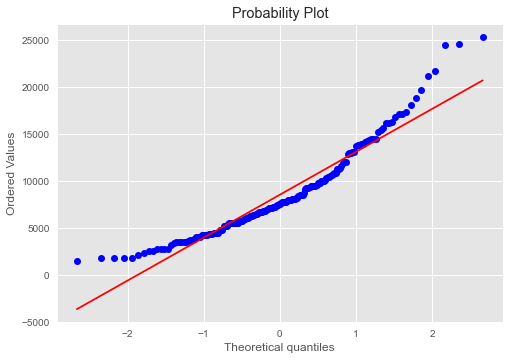

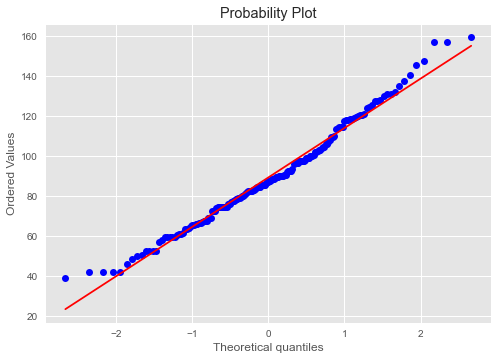

In [25]:
stats.probplot(ds.salario, dist="norm", plot=pylab)
pylab.show()
stats.probplot(ds.sqrt_salario, dist="norm", plot=pylab)
pylab.show()

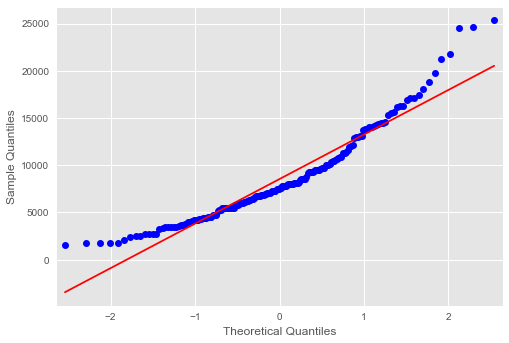

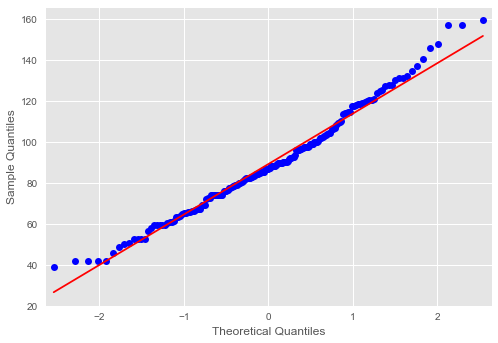

In [26]:
sm.qqplot(ds.salario, line='s')
pylab.show()
sm.qqplot(ds.sqrt_salario, line='s')
pylab.show()

### Podemos usar o gráfico de regressão linear para ver se há uma correlação entre as variáveis

#### Nos exemplos, testamos salario com idade, tempo de casa e demais variáveis

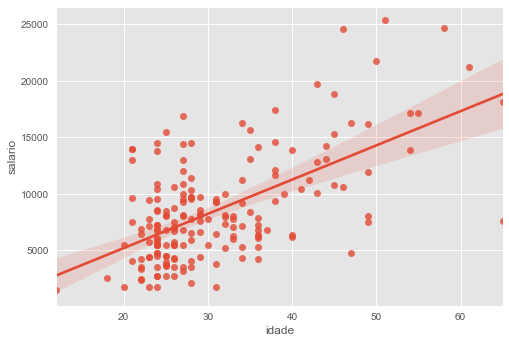

In [27]:
sns.regplot(x=ds["idade"], y=ds["salario"]);

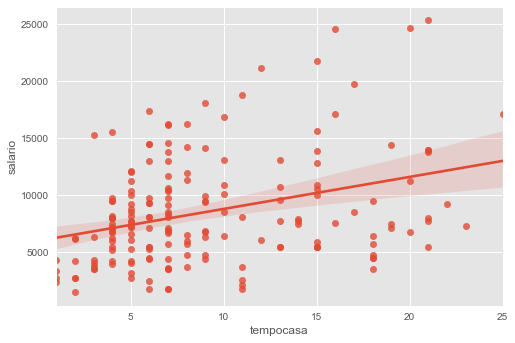

In [28]:
sns.regplot(x=ds["tempocasa"], y=ds["salario"]);

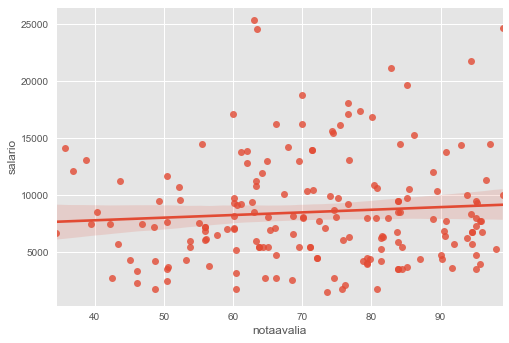

In [29]:
sns.regplot(x=ds["notaavalia"], y=ds["salario"]);

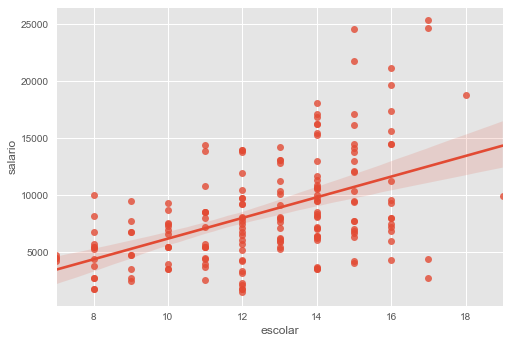

In [30]:
sns.regplot(x=ds["escolar"], y=ds["salario"]);

### Podemos analisar em gráfico de boxplot salario de acordo com a quantidade de projetos

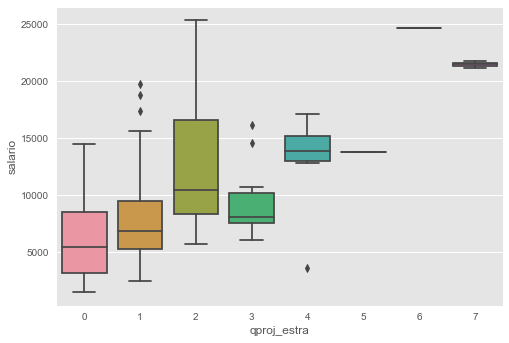

In [31]:
ax = sns.boxplot(x="qproj_estra", y="salario", data=ds)

## Como também podemos analisar salário com projetos sustentáveis

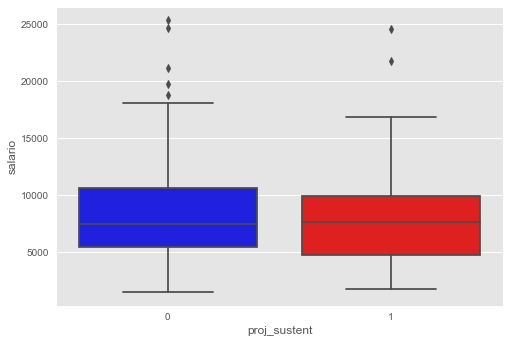

In [32]:
ax = sns.boxplot(x="proj_sustent", y="salario", data=ds, palette={'red','blue'})

## Podemos analisar em conjunto com o projeto de 6sigma

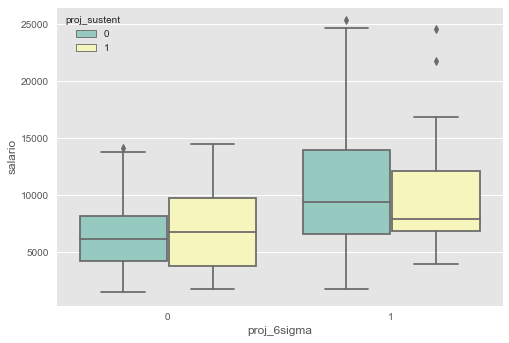

In [33]:
ax = sns.boxplot(x="proj_6sigma", y="salario", hue="proj_sustent", data=ds, palette="Set3")

### Podemos combinar na análise o Boxplot com o Swarmplot 

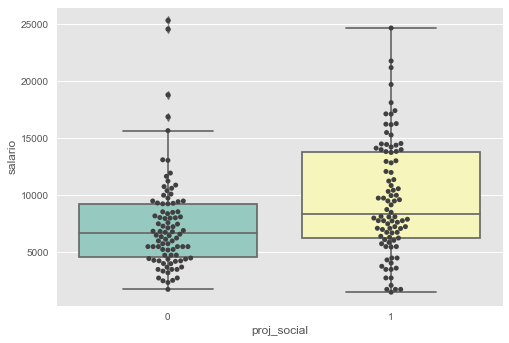

In [34]:
ax = sns.boxplot(x="proj_social", y="salario", data=ds, palette="Set3")
ax = sns.swarmplot(x="proj_social", y="salario", data=ds, color=".25")

### Excluir as colunas criadas do Dataframe

In [35]:
ds = ds.drop(columns=['f_salario','sqrt_salario'])

### Como identifcamos uma criança "outlier", podemos eliminá-la, criando um novo Dataframe

In [36]:
salario_semout =  ds.query('idade >= 18').copy()

In [37]:
salario_semout.shape

(179, 10)

#### e fazemos novamente a análise de correlação

In [38]:
salario_semout.corr()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
Ordem,1.00,0.18,0.20,0.13,0.37,0.11,0.16,-0.02,0.15,-0.01
salario,0.18,1.00,0.60,0.33,0.49,0.51,-0.02,0.35,0.25,0.08
idade,0.20,0.60,1.00,0.20,0.30,0.48,-0.11,0.15,0.01,0.04
tempocasa,0.13,0.33,0.20,1.00,-0.06,0.08,-0.04,0.11,-0.03,0.07
escolar,0.37,0.49,0.30,-0.06,1.00,0.30,-0.10,0.15,0.18,-0.06
qproj_estra,0.11,0.51,0.48,0.08,0.30,1.00,-0.06,0.24,0.27,0.09
proj_sustent,0.16,-0.02,-0.11,-0.04,-0.10,-0.06,1.00,-0.07,0.25,0.05
proj_6sigma,-0.02,0.35,0.15,0.11,0.15,0.24,-0.07,1.00,0.06,0.07
proj_social,0.15,0.25,0.01,-0.03,0.18,0.27,0.25,0.06,1.00,0.12
notaavalia,-0.01,0.08,0.04,0.07,-0.06,0.09,0.05,0.07,0.12,1.00


### Melhoramos a visualização dando cores a tabela de correlação

In [39]:
salario_semout.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis=1)

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
Ordem,1.0,0.18,0.2,0.13,0.37,0.11,0.16,-0.019,0.15,-0.015
salario,0.18,1.0,0.6,0.33,0.49,0.51,-0.023,0.35,0.25,0.08
idade,0.2,0.6,1.0,0.2,0.3,0.48,-0.11,0.15,0.0073,0.04
tempocasa,0.13,0.33,0.2,1.0,-0.06,0.08,-0.044,0.11,-0.026,0.071
escolar,0.37,0.49,0.3,-0.06,1.0,0.3,-0.1,0.15,0.18,-0.06
qproj_estra,0.11,0.51,0.48,0.08,0.3,1.0,-0.061,0.24,0.27,0.094
proj_sustent,0.16,-0.023,-0.11,-0.044,-0.1,-0.061,1.0,-0.066,0.25,0.052
proj_6sigma,-0.019,0.35,0.15,0.11,0.15,0.24,-0.066,1.0,0.062,0.07
proj_social,0.15,0.25,0.0073,-0.026,0.18,0.27,0.25,0.062,1.0,0.12
notaavalia,-0.015,0.08,0.04,0.071,-0.06,0.094,0.052,0.07,0.12,1.0


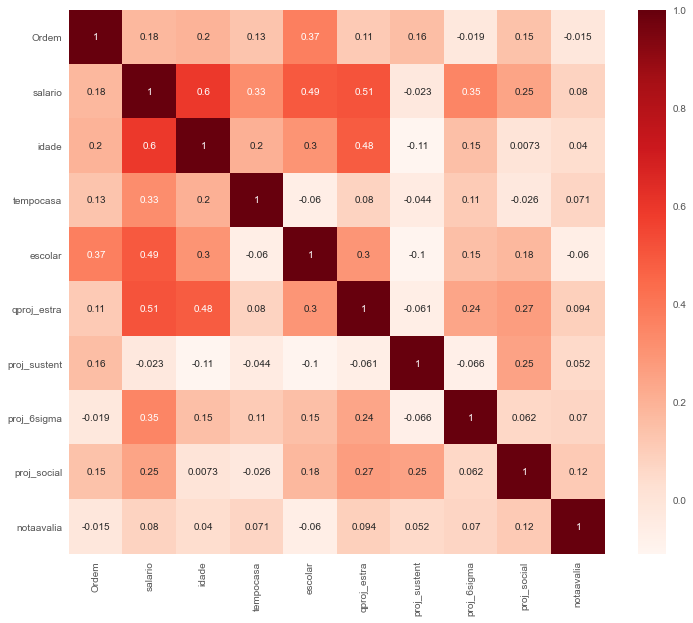

In [40]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = salario_semout.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Podemos selecionar as variáveis mais relevantes

In [41]:
salario_semout.corr()
cor_target = abs(cor["salario"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

salario                       1.00
idade                         0.60
tempocasa                     0.33
escolar                       0.49
qproj_estra                   0.51
proj_6sigma                   0.35
proj_social                   0.25
Name: salario, dtype: float64

## Alguns algorítmos precisam que as variáveis sejam padronizadas ou normalizadas

As duas técnicas tem o mesmo objetivo: transformar todas as variáveis na mesma ordem de grandeza. E a diferença básica é que padronizar as variáveis irá resultar em uma média igual a 0 e um desvio padrão igual a 1. Já normalizar tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1.


**Normatizando / Normalizando uma variável - Transforme recursos dimensionando cada recurso para um determinado intervalo.**

Este estimador dimensiona e traduz cada característica individualmente, de modo que esteja no intervalo dado no conjunto de treinamento, por exemplo, entre zero e um.

A transformação é dada por:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
onde min, max = feature_range.

Essa transformação é freqüentemente usada como uma alternativa para a escala de variação de unidade de média zero.

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
salario_semout['sal_normal'] = scaler.fit_transform(salario_semout[['salario']])

In [43]:
salario_semout.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia,sal_normal
count,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00
mean,90.98,"8,578.81",31.15,9.11,12.59,1.28,0.28,0.55,0.50,71.73,0.29
std,51.86,"4,713.17",9.32,5.60,2.58,1.22,0.45,0.50,0.50,16.04,0.20
min,1.00,"1,750.18",18.00,1.00,7.00,0.00,0.00,0.00,0.00,34.48,0.00
25%,46.50,"5,500.43",24.00,5.00,11.00,1.00,0.00,0.00,0.00,60.39,0.16
50%,91.00,"7,600.41",28.00,7.00,13.00,1.00,0.00,1.00,0.00,72.08,0.25
75%,135.50,"10,594.24",36.00,13.00,14.00,1.00,1.00,1.00,1.00,83.85,0.38
max,180.00,"25,329.91",65.00,25.00,19.00,7.00,1.00,1.00,1.00,98.96,1.00


** Em todo dataset **

In [44]:
sal_normalMinMax = salario_semout.drop(columns=['sal_normal'])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
sal_MinMax = pd.DataFrame(scaler.fit_transform(sal_normalMinMax), columns=sal_normalMinMax.columns, index=sal_normalMinMax.index)
sal_MinMax.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00
mean,0.50,0.29,0.28,0.34,0.47,0.18,0.28,0.55,0.50,0.58
std,0.29,0.20,0.20,0.23,0.21,0.17,0.45,0.50,0.50,0.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.16,0.13,0.17,0.33,0.14,0.00,0.00,0.00,0.40
50%,0.50,0.25,0.21,0.25,0.50,0.14,0.00,1.00,0.00,0.58
75%,0.75,0.38,0.38,0.50,0.58,0.14,1.00,1.00,1.00,0.77
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


**Padronize os recursos removendo a média e escalonando para a variância da unidade**

A pontuação padrão de uma amostra **x** é calculada como:

z = (x - u) / s

onde **u** é a média das amostras de treinamento ou zero se with_mean=False, e **s** é o desvio padrão das amostras de treinamento ou um se with_std=False.

In [45]:
from sklearn.preprocessing import StandardScaler
sc_sal = StandardScaler()
salario_semout['sal_normalstd'] = sc_sal.fit_transform(salario_semout[['salario']])

In [46]:
salario_semout.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia,sal_normal,sal_normalstd
count,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00
mean,90.98,"8,578.81",31.15,9.11,12.59,1.28,0.28,0.55,0.50,71.73,0.29,0.00
std,51.86,"4,713.17",9.32,5.60,2.58,1.22,0.45,0.50,0.50,16.04,0.20,1.00
min,1.00,"1,750.18",18.00,1.00,7.00,0.00,0.00,0.00,0.00,34.48,0.00,-1.45
25%,46.50,"5,500.43",24.00,5.00,11.00,1.00,0.00,0.00,0.00,60.39,0.16,-0.65
50%,91.00,"7,600.41",28.00,7.00,13.00,1.00,0.00,1.00,0.00,72.08,0.25,-0.21
75%,135.50,"10,594.24",36.00,13.00,14.00,1.00,1.00,1.00,1.00,83.85,0.38,0.43
max,180.00,"25,329.91",65.00,25.00,19.00,7.00,1.00,1.00,1.00,98.96,1.00,3.56


In [47]:
sal_normalStd = salario_semout.drop(columns=['sal_normal','sal_normalstd'])
from sklearn.preprocessing import StandardScaler
sc_sal = StandardScaler()
sal_Std = pd.DataFrame(sc_sal.fit_transform(sal_normalStd), columns=sal_normalStd.columns, index=sal_normalStd.index)
sal_Std.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.74,-1.45,-1.41,-1.45,-2.17,-1.05,-0.62,-1.11,-0.99,-2.33
25%,-0.86,-0.65,-0.77,-0.74,-0.62,-0.23,-0.62,-1.11,-0.99,-0.71
50%,0.00,-0.21,-0.34,-0.38,0.16,-0.23,-0.62,0.90,-0.99,0.02
75%,0.86,0.43,0.52,0.70,0.55,-0.23,1.61,0.90,1.01,0.76
max,1.72,3.56,3.64,2.85,2.50,4.71,1.61,0.90,1.01,1.70


In [48]:
normalized_Std=(sal_normalStd-sal_normalStd.mean())/sal_normalStd.std()
normalized_Std.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.74,-1.45,-1.41,-1.45,-2.17,-1.05,-0.62,-1.11,-0.99,-2.32
25%,-0.86,-0.65,-0.77,-0.73,-0.62,-0.23,-0.62,-1.11,-0.99,-0.71
50%,0.00,-0.21,-0.34,-0.38,0.16,-0.23,-0.62,0.90,-0.99,0.02
75%,0.86,0.43,0.52,0.69,0.55,-0.23,1.60,0.90,1.00,0.76
max,1.72,3.55,3.63,2.84,2.49,4.70,1.60,0.90,1.00,1.70


In [49]:
normalized_MinMax=(sal_normalMinMax-sal_normalMinMax.min())/(sal_normalMinMax.max()-sal_normalMinMax.min())
normalized_MinMax.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00
mean,0.50,0.29,0.28,0.34,0.47,0.18,0.28,0.55,0.50,0.58
std,0.29,0.20,0.20,0.23,0.21,0.17,0.45,0.50,0.50,0.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.16,0.13,0.17,0.33,0.14,0.00,0.00,0.00,0.40
50%,0.50,0.25,0.21,0.25,0.50,0.14,0.00,1.00,0.00,0.58
75%,0.75,0.38,0.38,0.50,0.58,0.14,1.00,1.00,1.00,0.77
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [50]:
sal_MinMax.describe()

,Ordem,salario,idade,tempocasa,escolar,qproj_estra,proj_sustent,proj_6sigma,proj_social,notaavalia
count,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00,179.00
mean,0.50,0.29,0.28,0.34,0.47,0.18,0.28,0.55,0.50,0.58
std,0.29,0.20,0.20,0.23,0.21,0.17,0.45,0.50,0.50,0.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.16,0.13,0.17,0.33,0.14,0.00,0.00,0.00,0.40
50%,0.50,0.25,0.21,0.25,0.50,0.14,0.00,1.00,0.00,0.58
75%,0.75,0.38,0.38,0.50,0.58,0.14,1.00,1.00,1.00,0.77
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# Transformando as variáveis em Categóricas #

In [51]:
from sklearn.preprocessing import LabelEncoder 

dfloan = pd.read_csv('Datasets/Loan_Training_data.csv')

var_mod =['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 

le = LabelEncoder() 
# Transformando as variáveis em Dummies #
for i in var_mod: 
  dfloan[i] = le.fit_transform(dfloan[i]) 

dfloan.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# Transformando as variáveis em Dummies #

### Usando Pandas get_dummies ###

In [52]:
from sklearn.datasets import load_iris
sns.set()
%matplotlib inline

In [53]:
#Iris Plot
iris = load_iris()
n_samples, m_features = iris.data.shape

In [54]:
#Load Data
X, y = iris.data, iris.target
D_target_dummy = dict(zip(np.arange(iris.target_names.shape[0]), iris.target_names))

In [55]:
DF_data = pd.DataFrame(X,columns=iris.feature_names)
DF_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


In [56]:
DF_data["target"] = pd.Series(y).map(D_target_dummy)
DF_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [57]:
DF_data = pd.get_dummies(DF_data, columns=['target'])
DF_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_setosa,target_versicolor,target_virginica
0,5.10,3.50,1.40,0.20,1,0,0
1,4.90,3.00,1.40,0.20,1,0,0
2,4.70,3.20,1.30,0.20,1,0,0
3,4.60,3.10,1.50,0.20,1,0,0
4,5.00,3.60,1.40,0.20,1,0,0


In [58]:
df = pd.DataFrame({'P': ['p', 'q', 'p'], 'Q': ['q', 'p', 'r'],
                   'R': [2, 3, 4]})

In [59]:
df.head()

,P,Q,R
0,p,q,2
1,q,p,3
2,p,r,4


### Usando scikit-learn OneHotEncoder ###

In [60]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
DF_data = pd.DataFrame(X,columns=iris.feature_names)
DF_data["target"] = pd.Series(y).map(D_target_dummy)
DF_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [61]:
Enc_ohe, Enc_label = OneHotEncoder(), LabelEncoder()
DF_data["Dummies"] = Enc_label.fit_transform(DF_data["target"])

### Se quisesse que a variável target ficasse como categórica ###

In [62]:
DF_data.Dummies.value_counts()

0    50
1    50
2    50
Name: Dummies, dtype: int64

### Se quisesse que uma variável categórica ficasse como dummy ###

In [63]:
DF_dummies = pd.DataFrame(Enc_ohe.fit_transform(DF_data[["Dummies"]]).todense(), columns = Enc_label.classes_)
DF_dummies.head()

,setosa,versicolor,virginica
0,1.00,0.00,0.00
1,1.00,0.00,0.00
2,1.00,0.00,0.00
3,1.00,0.00,0.00
4,1.00,0.00,0.00


In [64]:
DF_data = DF_data.join(DF_dummies)

In [65]:
DF_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Dummies,setosa,versicolor,virginica
0,5.10,3.50,1.40,0.20,setosa,0,1.00,0.00,0.00
1,4.90,3.00,1.40,0.20,setosa,0,1.00,0.00,0.00
2,4.70,3.20,1.30,0.20,setosa,0,1.00,0.00,0.00
3,4.60,3.10,1.50,0.20,setosa,0,1.00,0.00,0.00
4,5.00,3.60,1.40,0.20,setosa,0,1.00,0.00,0.00


In [66]:
DF_data = DF_data.drop(columns=['Dummies', 'target'])

In [67]:
DF_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolor,virginica
0,5.10,3.50,1.40,0.20,1.00,0.00,0.00
1,4.90,3.00,1.40,0.20,1.00,0.00,0.00
2,4.70,3.20,1.30,0.20,1.00,0.00,0.00
3,4.60,3.10,1.50,0.20,1.00,0.00,0.00
4,5.00,3.60,1.40,0.20,1.00,0.00,0.00


**Para aprendizado de máquina, é quase certo que você queira usar sklearn.OneHotEncoder. Para outras tarefas, como análises simples, você pode usar pd.get_dummies, o que é um pouco mais conveniente.**

Observe que sklearn.OneHotEncoder foi atualizado na versão mais recente para que **aceite strings para variáveis categóricas**, bem como inteiros.

O ponto crucial é que o sklearn encoder cria uma função que **persiste** e pode **então ser aplicada a novos conjuntos de dados que usam as mesmas variáveis categóricas, com resultados consistentes.**

<code>
from sklearn.preprocessing import OneHotEncoder

#Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train)    # Assume for simplicity all features are categorical.

#Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
    
</code>

Observe como aplicamos o mesmo codificador que criamos X_train ao novo conjunto de dados X_test.

Considere o que acontece se X_test contiver níveis diferentes de X_train uma de suas variáveis. Por exemplo, digamos que X_train["color"] contém apenas "red" e "green", mas além desses, X_test["color"] às vezes contém "blue".

Se usarmos pd.get_dummies, X_test acabará com uma "color_blue"coluna adicional que X_train não tem, e a inconsistência provavelmente quebrará nosso código mais tarde, especialmente se estivermos alimentando X_test um sklearnmodel no qual treinamos X_train.

E se quisermos processar os dados como este na produção, onde recebemos um único exemplo de cada vez, pd.get_dummies não será útil.

OneHotEncoder por outro lado, depois de criar o codificador, podemos reutilizá-lo para produzir a mesma saída todas as vezes, com colunas apenas para "red" e "green". E podemos controlar explicitamente o que acontece quando ele encontra o novo nível "blue": se pensarmos que isso é impossível, podemos dizer para ele lançar um erro com handle_unknown="error"; caso contrário, podemos dizer para continuar e simplesmente definir as colunas vermelha e verde como 0, com handle_unknown="ignore".

# Agrupando as variáveis #

### O binning (ou bucketing) de dados agrupa os dados em bins (ou buckets), no sentido de que substitui os valores contidos em um pequeno intervalo por um único valor representativo para esse intervalo. Às vezes, binning melhora a precisão em modelos preditivos. ###

In [68]:
dfbanco = pd.read_csv('DataSets/Banco.csv',sep=';')

In [69]:
dfbanco.dtypes

Unnamed: 0          int64
id                  int64
datanasc           object
sexo               object
estudo              int64
catemp             object
salario           float64
salarin           float64
temp_ser            int64
cartao_credito      int64
Emprestimos        object
data_atual         object
idade               int64
dtype: object

In [70]:
dfbanco.head()

,Unnamed: 0,id,datanasc,sexo,estudo,catemp,salario,salarin,temp_ser,cartao_credito,Emprestimos,data_atual,idade
0,1,474,05/11/1968,Feminino,12,C,"29,400.00",NaN,63,5880,2940,24/11/2020,52
1,2,473,25/11/1937,Feminino,12,C,"21,450.00","12,750.00",63,4290,2145,24/11/2020,83
2,3,472,21/02/1966,Masculino,15,C,"39,150.00","15,750.00",63,7830,3915,24/11/2020,55
3,4,471,03/08/1966,Masculino,15,C,"26,400.00","15,750.00",64,5280,2640,24/11/2020,54
4,5,470,22/01/1964,Masculino,12,C,"26,250.00","15,750.00",64,5250,2625,24/11/2020,57


In [71]:
dfbanco.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0        0
id                0
datanasc          0
sexo              0
estudo            0
catemp            0
salario           0
salarin           1
temp_ser          0
cartao_credito    0
Emprestimos       0
data_atual        0
idade             0
dtype: int64

In [72]:
dfbanco.describe()

,Unnamed: 0,id,estudo,salario,salarin,temp_ser,cartao_credito,idade
count,512.00,512.00,512.00,512.00,511.00,512.00,512.00,512.00
mean,256.50,235.64,13.55,"34,997.09","17,179.56",81.24,"6,999.42",64.05
std,147.95,144.72,2.89,"18,156.07","8,378.08",10.63,"3,631.21",11.69
min,1.00,1.00,8.00,"15,750.00","9,000.00",63.00,"3,150.00",50.00
25%,128.75,106.75,12.00,"24,000.00","12,750.00",72.00,"4,800.00",55.00
50%,256.50,234.50,12.00,"29,100.00","15,000.00",81.00,"5,820.00",59.00
75%,384.25,362.25,15.00,"37,950.00","17,745.00",91.00,"7,590.00",72.00
max,512.00,474.00,21.00,"135,000.00","79,980.00",98.00,"27,000.00",92.00


In [73]:
dfbanco['salarin'].fillna(dfbanco['salarin'].min(), inplace=True) # para ajustar o que possui valor nulo, joguei o mínimo

# Poderia usar outras formas:
# df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True) ### Para valores
# df['Self_Employed'].fillna('No',inplace=True) ### Para padronizar dados
# df['Gender'].fillna(df['Gender'].mode()[0], inplace=True) ### Para padronizar dados categóricos

In [74]:
dfbanco.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0        0
id                0
datanasc          0
sexo              0
estudo            0
catemp            0
salario           0
salarin           0
temp_ser          0
cartao_credito    0
Emprestimos       0
data_atual        0
idade             0
dtype: int64

In [75]:
dfbanco.describe()

,Unnamed: 0,id,estudo,salario,salarin,temp_ser,cartao_credito,idade
count,512.00,512.00,512.00,512.00,512.00,512.00,512.00,512.00
mean,256.50,235.64,13.55,"34,997.09","17,163.58",81.24,"6,999.42",64.05
std,147.95,144.72,2.89,"18,156.07","8,377.68",10.63,"3,631.21",11.69
min,1.00,1.00,8.00,"15,750.00","9,000.00",63.00,"3,150.00",50.00
25%,128.75,106.75,12.00,"24,000.00","12,712.50",72.00,"4,800.00",55.00
50%,256.50,234.50,12.00,"29,100.00","15,000.00",81.00,"5,820.00",59.00
75%,384.25,362.25,15.00,"37,950.00","17,617.50",91.00,"7,590.00",72.00
max,512.00,474.00,21.00,"135,000.00","79,980.00",98.00,"27,000.00",92.00


### Binning por distância ###

Nesse caso, definimos as bordas de cada compartimento. Em Python, o pandasbinning por distância é realizado por meio da cut()função.

In [76]:
min_value = dfbanco['salario'].min() 
max_value =dfbanco['salario'].max() 
print (min_value) 
print (max_value)

15750.0
135000.0


Agora criamos 3 grupos usando a função **linspace** do Numpy

In [77]:
bins = np.linspace (min_value, max_value, 4) 
bins

array([ 15750.,  55500.,  95250., 135000.])

Definimos os rótulos e usuamos a função cut para quebrar os valores nos grupos

In [78]:
labels = ['pequeno', 'medio', 'grande']
dfbanco['bins'] = pd.cut(dfbanco['salario'], bins=bins, labels=labels, include_lowest=True)

Agora podemos ver como estão espalhados

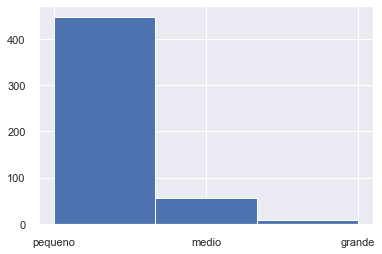

In [79]:
plt.hist(dfbanco['bins'], bins=3);

Você pode definir os grupos manualmente

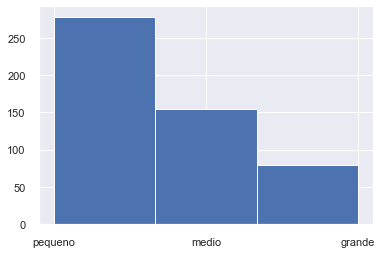

In [80]:
bins = [ 0, 30000, 50000, 10000000 ]
dfbanco['bin_cut_manual'] = pd.cut(dfbanco['salario'] , bins=bins, labels=labels, include_lowest=True)
plt.hist(dfbanco['bin_cut_manual'], bins=3)
plt.show()

### Binning por frequência ###
A categorização por frequência calcula o tamanho de cada caixa de forma que cada caixa contenha o (quase) mesmo número de observações, mas o intervalo da categoria irá variar. Podemos usar a função qcut() do Pandas. Podemos definir a parâmetro de precisão para definir o número de casas decimais.

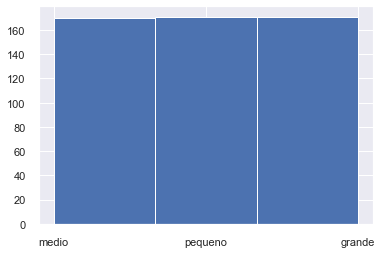

In [81]:
dfbanco['bin_qcut'] = pd.qcut(dfbanco['salario'], q=3, precision=1, labels=labels)
plt.hist(dfbanco['bin_qcut'], bins=3)
plt.show()

### Binning por Amostragem ###
A amostragem é outra técnica de binning de dados. Permite reduzir o número de amostras, agrupando valores semelhantes ou valores contíguos. Existem três abordagens para realizar a amostragem:
por bin significa: cada valor em um bin é substituído pelo valor médio do bin.
por bin median: cada valor bin é substituído por seu valor bin median.
por limite de bin: cada valor de bin é substituído pelo valor de limite mais próximo, ou seja, valor máximo ou mínimo do bin.

Para realizar a amostragem, a binned_statistic() função da scipy.statsembalagem pode ser usada. Esta função recebe duas matrizes como entrada, x_data e y_data, assim como as estatísticas a serem usadas (por exemplo, mediana ou média) e o número de bins a serem criados. A função retorna os valores das caixas, bem como as bordas de cada caixa.

In [82]:
from scipy.stats import binned_statistic 
x_data = np.arange (0, len (dfbanco)) 
y_data = dfbanco['salario'] 
x_bins, bin_edges, misc = binned_statistic (y_data, x_data, statistic = "median", bins = 2)

Agora devemos aproximar cada valor da coluna **dfbanco['salario']** ao valor mediano do bin correspondente. Assim, convertemos as bordas do compartimento em um IntervalIndex, que recebe como índice as bordas esquerda e direita de cada intervalo. Em nosso caso, as bordas esquerdas começam no início das bordas da caixa e não contêm o último valor das bordas da caixa. Em vez disso, as bordas direitas começam a partir do segundo valor das bordas do compartimento e duram até o último valor.

In [83]:
bin_intervals = pd.IntervalIndex.from_arrays (bin_edges [: - 1], bin_edges [1:])

Podemos quantizar a coluna Salário definindo uma função set_to_median() que percorre os intervalos e, quando encontra o intervalo correto, retorna o valor médio.

In [84]:
def set_to_median (x, bin_intervals): 
    for interval in bin_intervals: 
        if x in interval: 
            return interval.mid

Usamos a função apply() para aplicar o set_to_median() à coluna Salário.

In [85]:
dfbanco['sampled_salario'] = dfbanco['salario'].apply(lambda x: set_to_median (x, bin_intervals))

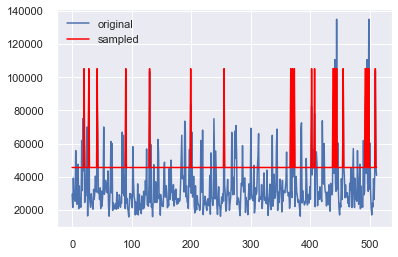

In [86]:
plt.plot (dfbanco ['salario'], label = 'original') 
plt.plot (dfbanco ['sampled_salario'], color = 'red', label = 'sampled') 
plt.legend () 
plt.show ()

Finalmente, podemos plotar os valores medianos. Podemos calcular os valores de y(y_bins) correspondentes aos valores categorizados (x_bins) como os valores no centro do intervalo de compartimentos.

In [87]:
y_bins = (bin_edges [: - 1] + bin_edges [1:]) / 2 
y_bins

array([ 45562.5, 105187.5])

Então planejamos:

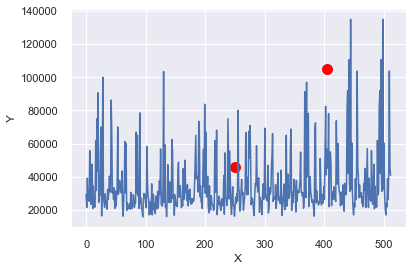

In [88]:
plt.plot (x_data, y_data) 
plt.xlabel ("X"); 
plt.ylabel ("Y")
plt.scatter (x_bins, y_bins, color = 'red', linewidth = 5) 
plt.show ()

### Calcule as quebras naturais nos dados ###

Podemos usar o pacote jenkspy, que contém uma única função, chamada jenks_breaks(), que calcula as quebras naturais de um array, explorando o algoritmo de Fisher-Jenks . Podemos instalar o pacote executando pip install jenkspy.

In [89]:
import jenkspy 
breaks = jenkspy.jenks_breaks (dfbanco['salario'], nb_class = 3)

Agora podemos usar a cut()função para transformar dados em rótulos.

In [90]:
dfbanco['bin_cut_break'] = pd.cut(dfbanco['salario'], bins=breaks, labels = labels, include_lowest = True)

Agora podemos plotar o resultado:

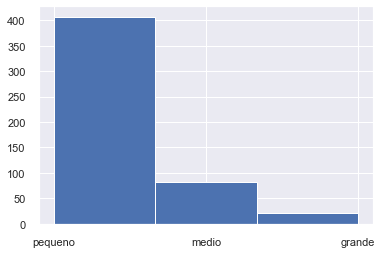

In [91]:
plt.hist(dfbanco['bin_cut_break'], bins=3)
plt.show()